In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc

In [2]:
df = pd.read_excel("/Users/eudieentela/Downloads/churn.xlsx", index_col=None)

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## EDA Section

In [4]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [5]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

**_The column "Churn Reason" contains 5174 null rows because that is the number of customers that have not churned._**

In [6]:
#Fill null values with text because product is still being used
df['Churn Reason'] = df['Churn Reason'].fillna("Still using product")

In [7]:
df.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

**_Churn Reason now shows 0 null values_**

In [8]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

**_Most columns are of object type, some are or type float and int. These can be used for the regression model. Additionally, the 'Total Charges' column can also be a factor in the regression models_**

In [9]:
#Convert Total Charges column to a numeric value
df["Total Charges"].replace(' ', 0, inplace=True)
df["Total Charges"] = df["Total Charges"].fillna(0)
df["Total Charges"] = df["Total Charges"].astype(float)

## Data Visualization

### Plotting the Number of Clients That Have Churn VS Have not Churned

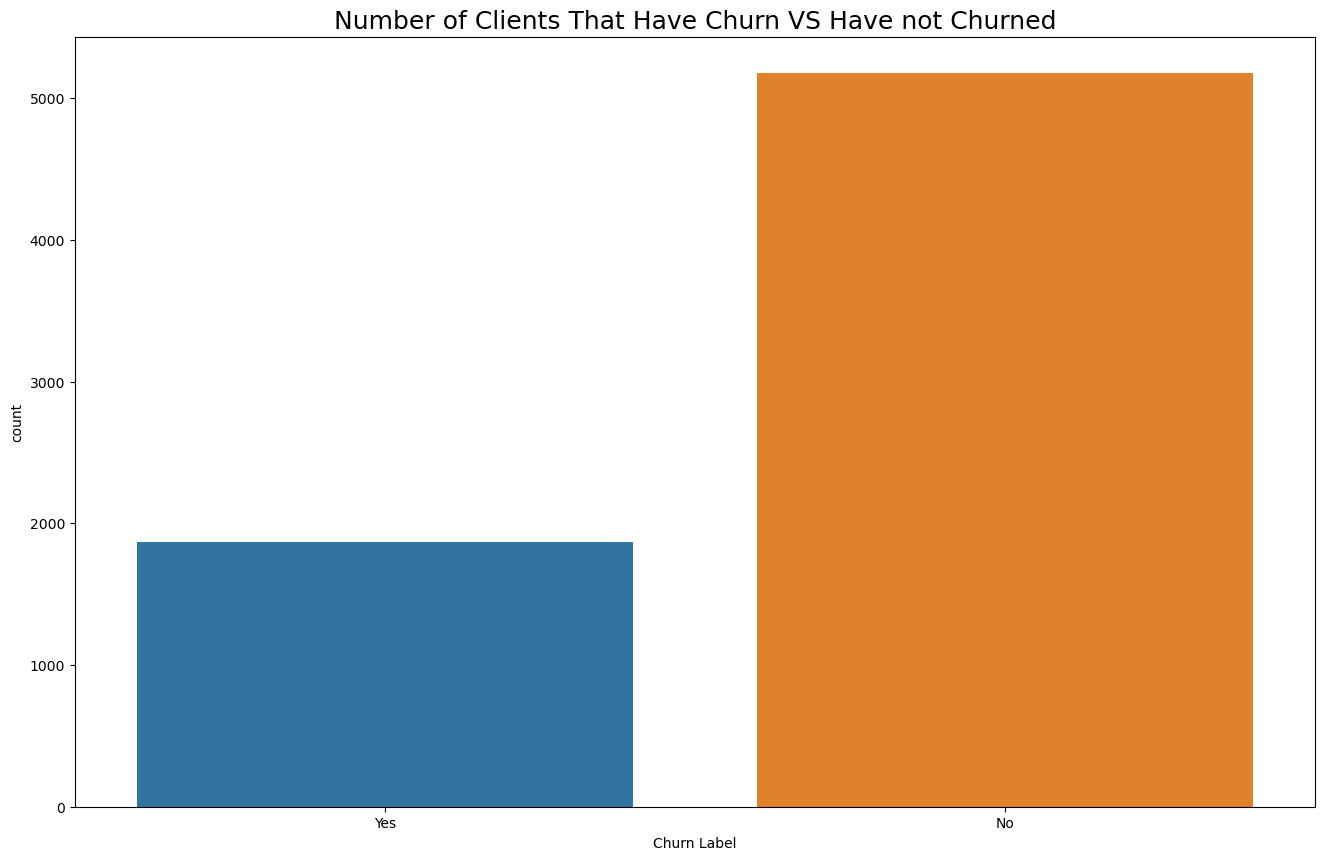

In [10]:
#Plot countplot to show data using Churn Label
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.countplot(x = "Churn Label", data = df)

#Adding title
plt.title('Number of Clients That Have Churn VS Have not Churned', fontsize=18);

### Plotting a Barplot for the Number of Clients that Churned and the Reason They Have

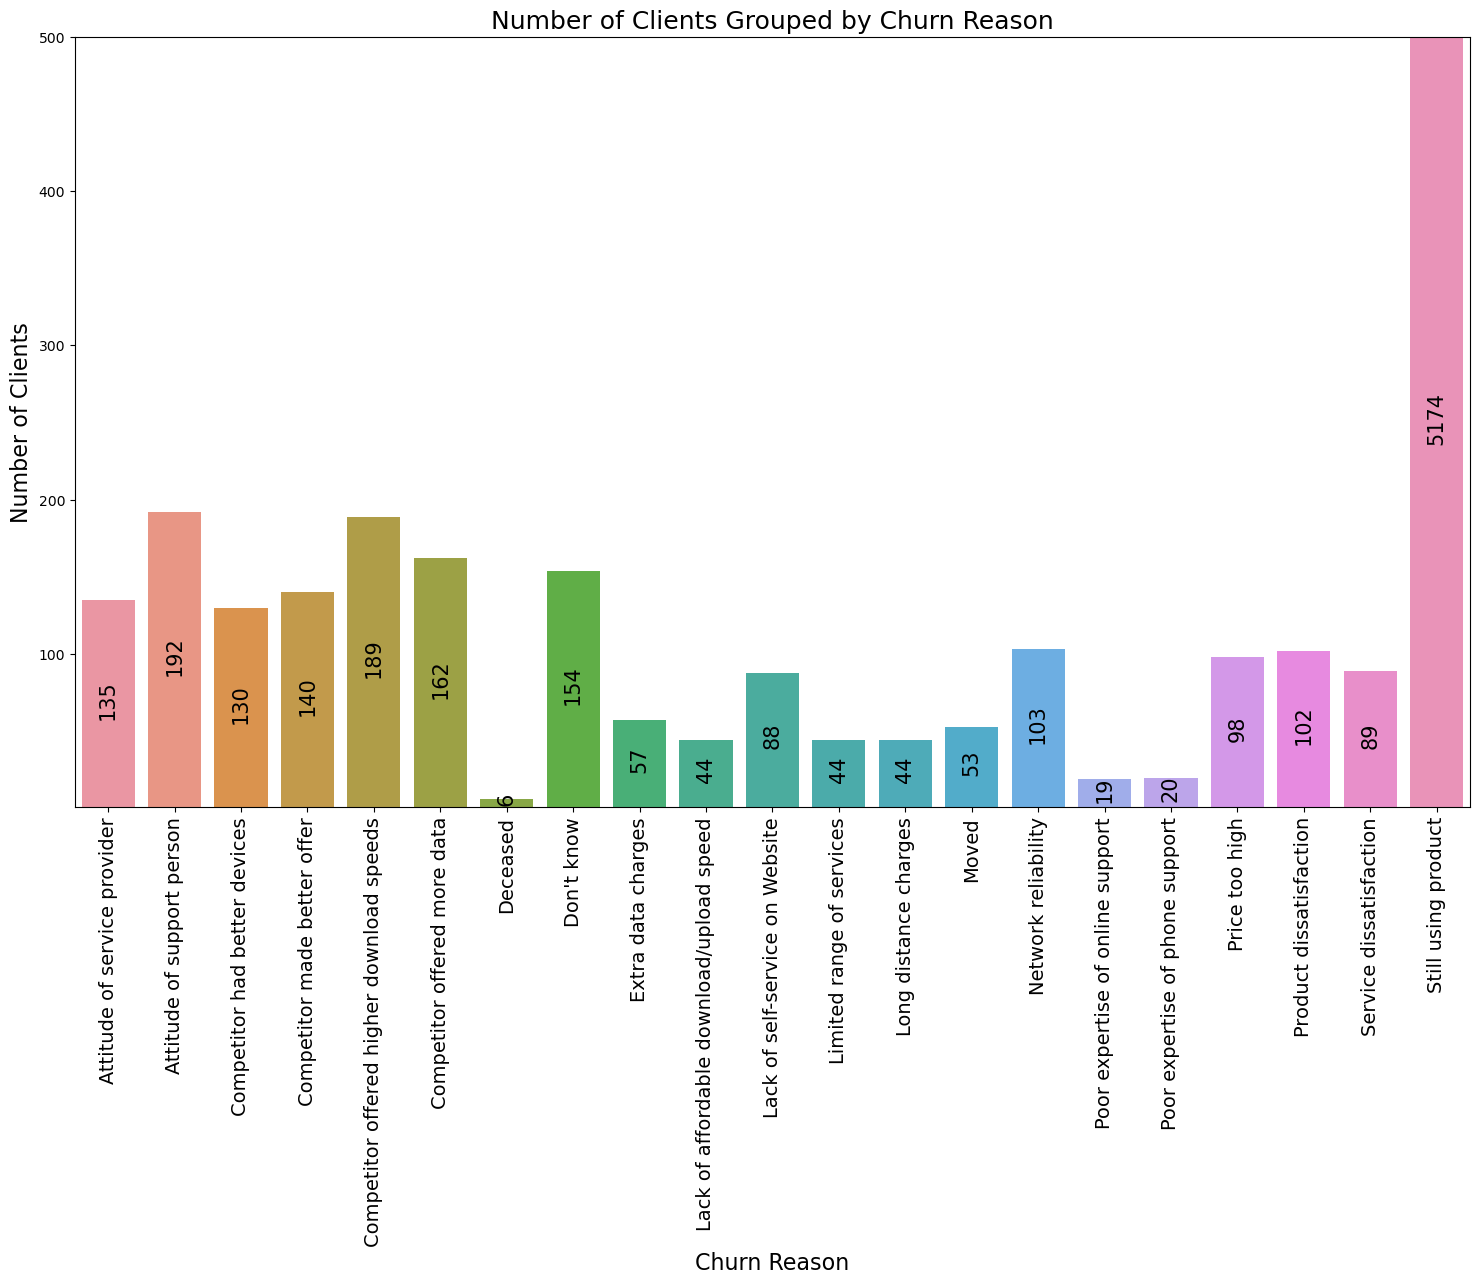

In [11]:
#Group data by the same reason
reason = df.groupby('Churn Reason').count()
reason.reset_index(inplace=True)

#Plotting the bar plot
fig, ax = plt.subplots(figsize=(18,10))
bar_container = sns.barplot(x='Churn Reason', y='CustomerID', data=reason)

#Adjust Visualization
ax.set_ylim(1, 500)
ax.bar_label(ax.containers[0], fontsize=15, padding=3, rotation=90, label_type='center')
ax.set_ylabel('Number of Clients', fontsize = 16)
ax.set_xlabel('Churn Reason', fontsize = 16)
plt.title('Number of Clients Grouped by Churn Reason', fontsize=18)
plt.xticks(rotation=90, fontsize = 14);

**_Out of the 7043 customers, most of them have not churned. Most who have churned have left for another competitor because of a greater offer or better service rather than a reason of their own._**

### Plotting a Piechart of Churn Scores Grouped Together

In [12]:
#Creating a function to sort the churn scores
def sort_score(churn_score):
    if churn_score < 21:
        return '0 - 20%'
    elif churn_score < 31:
        return '21 - 30%'
    elif churn_score < 41:
        return '31 - 40%'
    elif churn_score < 51:
        return '41 - 50%'
    elif churn_score < 61:
        return '51 - 60%'
    elif churn_score < 71:
        return '61 - 70%'
    elif churn_score < 81:
        return '71 - 80%'
    elif churn_score < 91:
        return '81 - 90%'
    else:
        return '91 - 100%'

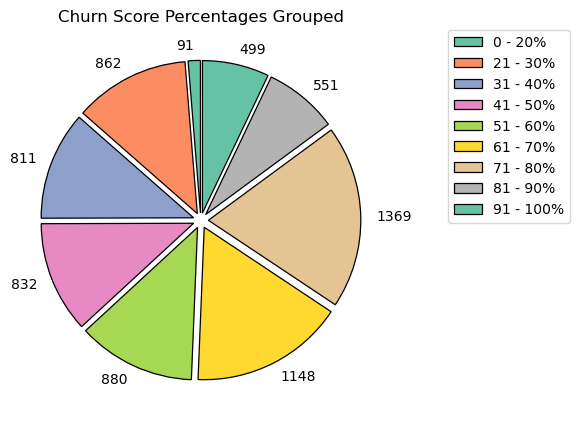

In [13]:
#Create a new column that sort them into classes based on their churn score
df['Score Class'] = df['Churn Score'].apply(sort_score)

#Group by and count different classes
score = df[['Score Class', 'Churn Score']]
pie_score = score.groupby('Score Class')['Churn Score'].count()
pie_score = pd.DataFrame(pie_score)
pie_score.reset_index(inplace=True)

classes = pie_score['Score Class']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(pie_score['Churn Score'], labels=pie_score['Churn Score'],
           colors=sns.color_palette('Set2'), startangle=90, 
      explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
      wedgeprops={'linewidth': 0.9, 'edgecolor': 'black'})
plt.legend(classes,bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0)
plt.title("Churn Score Percentages Grouped")
plt.tight_layout();

### Plotting the Customer Churn Score Relative to Their Tenure in Months

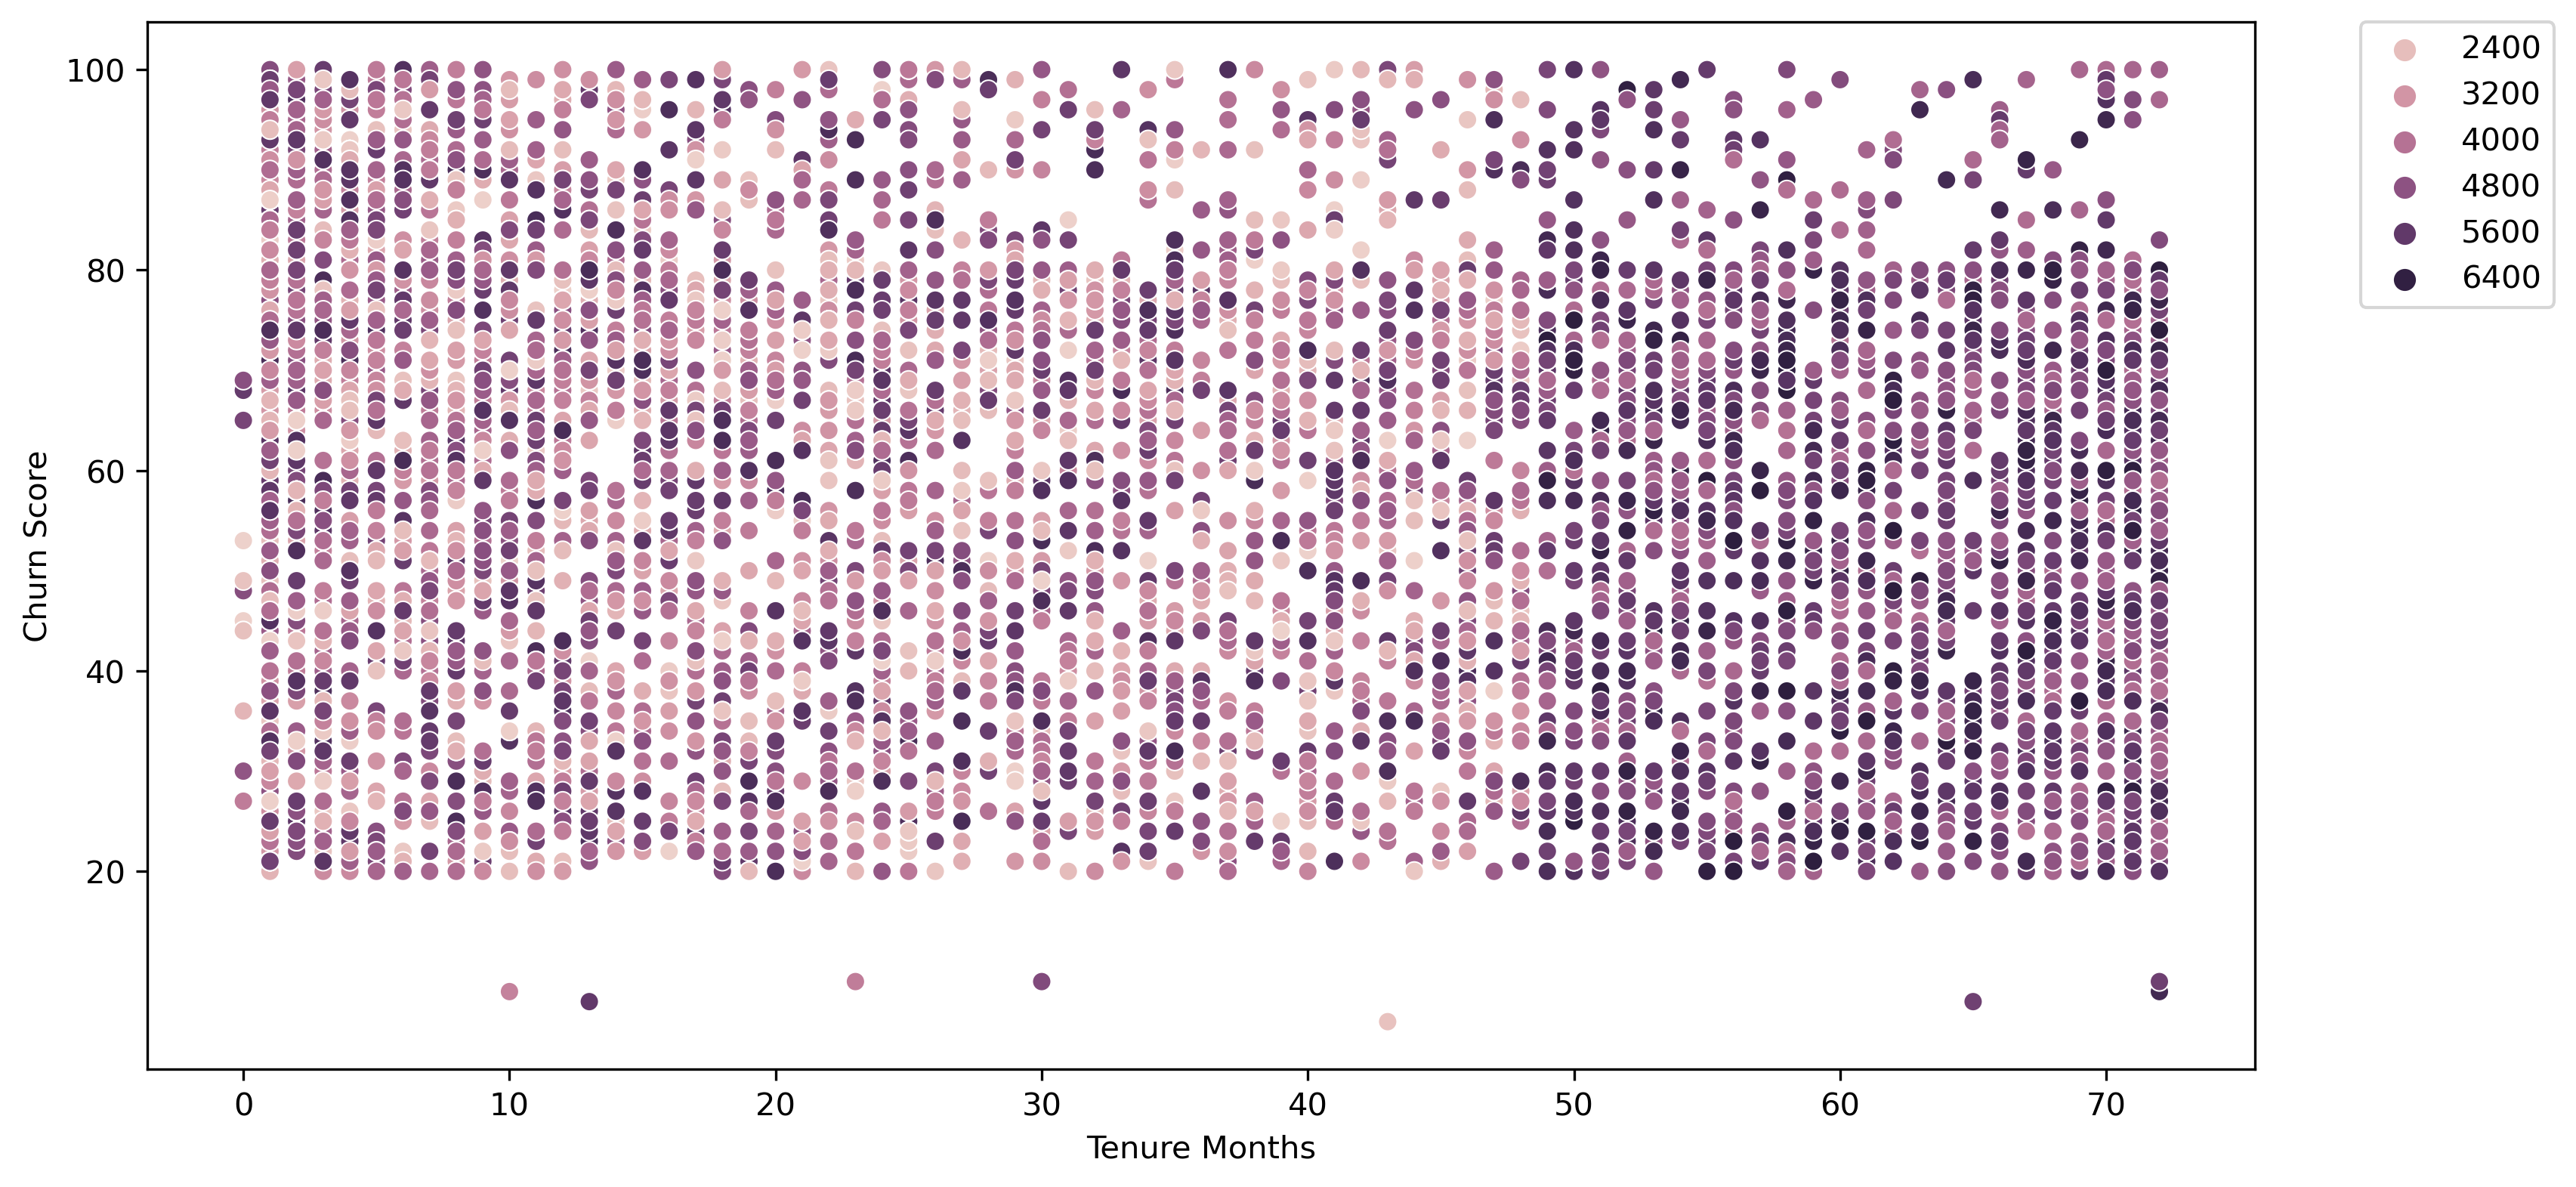

In [14]:
#Plotting a scatter plot to illustrate the relationship between the two.
plt.figure(figsize=(12,6),dpi=300)
sns.scatterplot(data=df, x='Tenure Months', y='Churn Score', hue='CLTV')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

**_Longer tenure = higher CLTV_**

**_Shorter tenure = lower CLTV_**

**_Churn Score is mostly scattered regarless of the tenure duration_**

<Axes: >

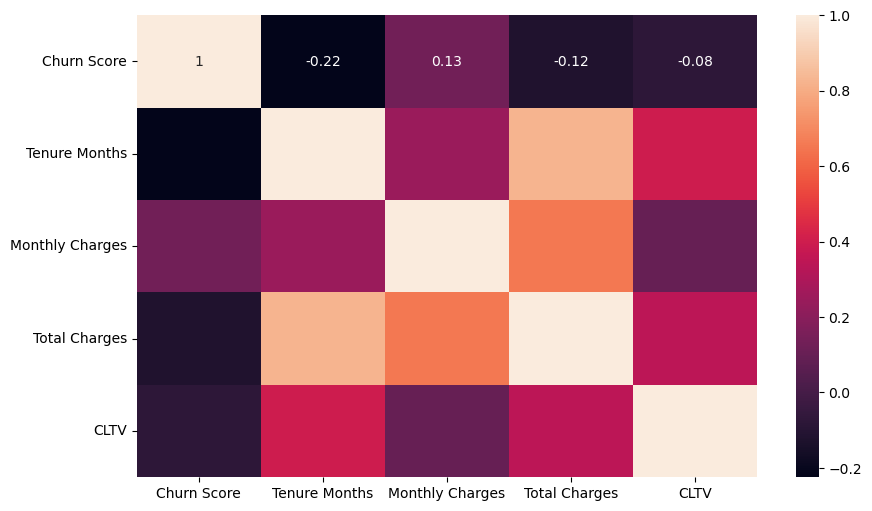

In [15]:
new_df = df[["Churn Score", "Tenure Months", "Monthly Charges", "Total Charges", "CLTV"]]
plt.figure(figsize=(10, 6))
sns.heatmap(new_df.corr(), annot=True)

### Plotting the Different Additional Services Offered and the Number of Customers That Have Opted for Them

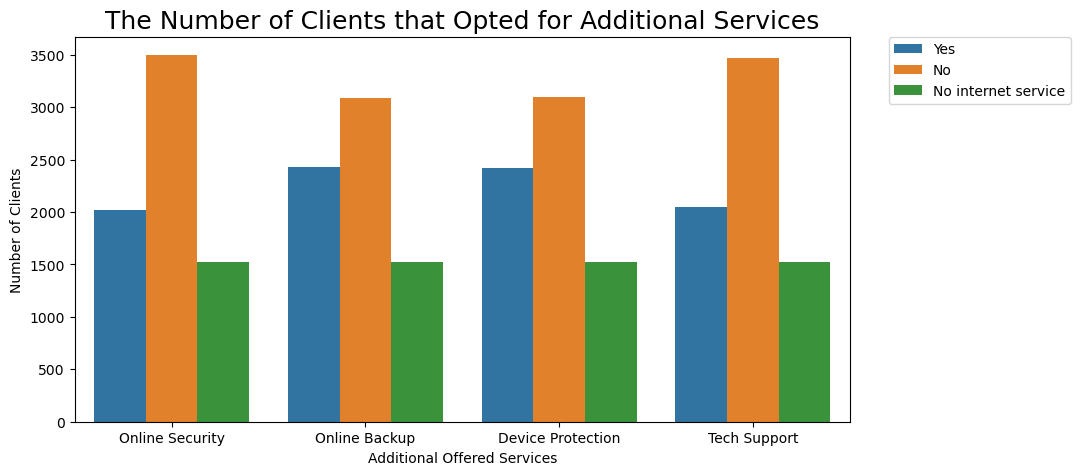

In [16]:
#Create df for the four additional services
services_df = df[['Online Security', 'Online Backup', 'Device Protection', 'Tech Support']]
services_df1 = services_df.melt(var_name='additional', value_name='opt')

#Plotting countplot
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='additional', hue='opt', data=services_df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('The Number of Clients that Opted for Additional Services', fontsize=18)
ax.set(ylabel='Number of Clients', xlabel='Additional Offered Services');

### Plotting the Number of Customers With Different Contract Types by Gender

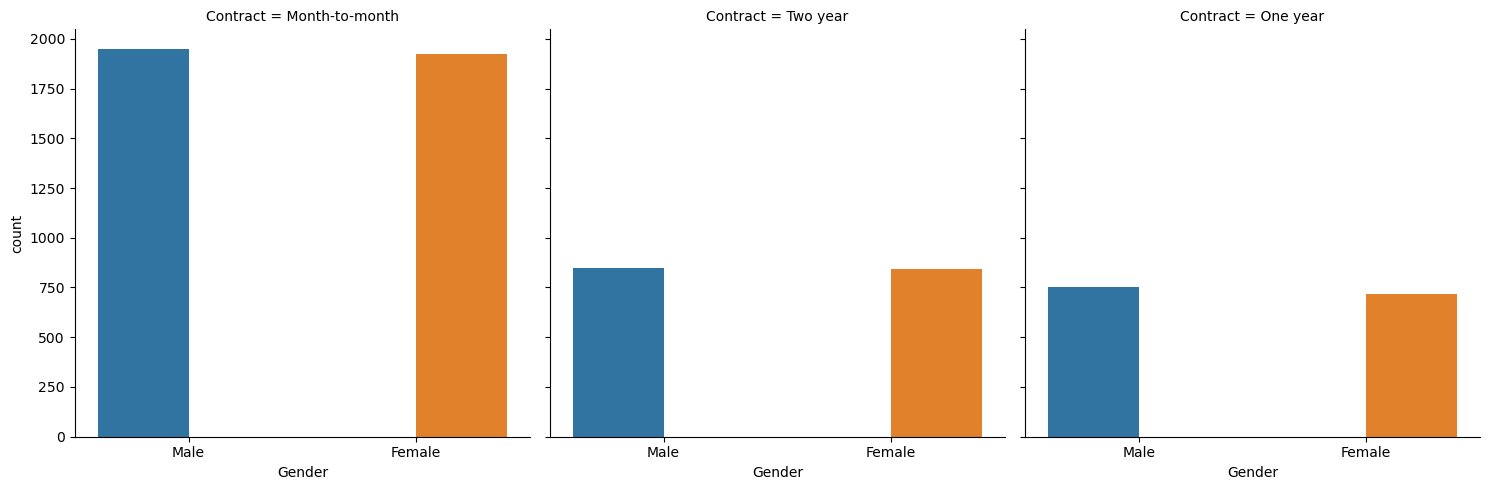

In [17]:
sns.catplot(data=df,x='Gender',hue='Gender',col='Contract',kind='count')

## Classification Models

**_I have chosen to use five columns of numeric value in order to predict the Churn Label (Yes or No). These factors include the customers tenure in months, their monthly charges, their total charges for their whole duration, their churn score and CLTV_**

### Logistic Regression - Model Prediction #1

In [18]:
new_df = df[["Churn Label", "Tenure Months", "Monthly Charges", "Total Charges", "Churn Score", "CLTV"]]

# Separate X and y
X = new_df.drop('Churn Label', axis=1) #Features
y = new_df['Churn Label'] #Target Variable

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
# Scale data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
#Instantiate the model
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [22]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [23]:
#Instantiate the gridsearch using the log_model
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [24]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [25]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [26]:
y_pred = grid_model.predict(scaled_X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[492  27]
 [ 34 152]]


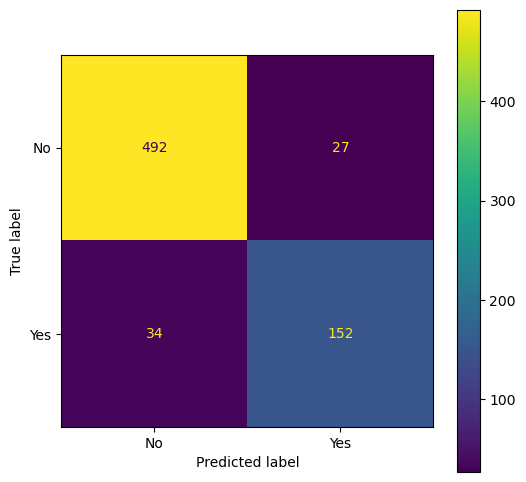

In [27]:
disp = ConfusionMatrixDisplay(cm, display_labels=grid_model.classes_)
disp.plot()
fig = disp.figure_
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

In [28]:
# Evaluation the model using the classification_report
logreg_classification_report = classification_report(y_test,y_pred)
print(logreg_classification_report)

              precision    recall  f1-score   support

          No       0.94      0.95      0.94       519
         Yes       0.85      0.82      0.83       186

    accuracy                           0.91       705
   macro avg       0.89      0.88      0.89       705
weighted avg       0.91      0.91      0.91       705



**_The logistic regression has an 88% accuracy score_**

## Decision Tree Classification - Model Prediction #2

In [29]:
new_df = df[["Churn Label", "Tenure Months", "Monthly Charges", "Total Charges", "Churn Score", "CLTV"]]

# Separate X and y
X = new_df.drop('Churn Label', axis=1) #Features
y = new_df['Churn Label'] #Target Variable

In [30]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
# Scale data

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
 # Select the columns to be encoded
columns_to_encode = ["Tenure Months", "Monthly Charges", "Total Charges", "CLTV", "Churn Score"]

# Apply the encoding to the selected columns in the training set
X_train[columns_to_encode] = encoder.fit_transform(X_train[columns_to_encode])

# Apply the encoding to the selected columns in the test set
X_test[columns_to_encode] = encoder.fit_transform(X_test[columns_to_encode])

In [33]:
X_test.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
185,14.0,537.0,627.0,76.0,341.0
2715,17.0,251.0,569.0,39.0,978.0
3825,1.0,21.0,36.0,19.0,45.0
1807,5.0,510.0,381.0,52.0,1062.0
132,39.0,749.0,1067.0,68.0,314.0


In [34]:
X_train.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
2142,71.0,1193.0,5003.0,12.0,2125.0
1623,16.0,1091.0,2694.0,59.0,2446.0
6074,32.0,1288.0,3723.0,44.0,215.0
1362,24.0,242.0,1944.0,69.0,1131.0
6754,20.0,30.0,1149.0,27.0,434.0


In [35]:
# Instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [36]:
y_pred_en = clf_en.predict(X_test)

dt_score = format(accuracy_score(y_test, y_pred_en))

print("Decision Tree Accuracy Score:", dt_score)

Decision Tree Accuracy Score: 0.8701206529453513


## Random Forest Classification- Model Prediction #3

In [37]:
new_df = df[["Churn Label", "Tenure Months", "Monthly Charges", "Total Charges", "Churn Score", "CLTV"]]

# Separate X and y
X = new_df.drop('Churn Label', axis=1)
y = new_df['Churn Label']

In [38]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
# Scale data

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
# Encode ordinal features
encoder = OrdinalEncoder()
columns_to_encode = ["Tenure Months", "Monthly Charges", "Total Charges", "Churn Score", "CLTV"]
X_train[columns_to_encode] = encoder.fit_transform(X_train[columns_to_encode])
X_test[columns_to_encode] = encoder.fit_transform(X_test[columns_to_encode])

In [41]:
# Create instance of model with default values
rfc = RandomForestClassifier(random_state=0)

# Fit  model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
y_pred = rfc.predict(X_test)

rf_score = format(accuracy_score(y_test, y_pred))

print("Random Forest Accuracy Score:", rf_score)

Random Forest Accuracy Score: 0.8765081618168914


In [43]:
# Confusion Matrix for final model
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[988  21]
 [153 247]]


In [44]:
print(logreg_classification_report)

              precision    recall  f1-score   support

          No       0.94      0.95      0.94       519
         Yes       0.85      0.82      0.83       186

    accuracy                           0.91       705
   macro avg       0.89      0.88      0.89       705
weighted avg       0.91      0.91      0.91       705



In [45]:
print("Random Forest Accuracy Score:", rf_score)
print("Decision Tree Accuracy Score:", dt_score)

Random Forest Accuracy Score: 0.8765081618168914
Decision Tree Accuracy Score: 0.8701206529453513


## K-Fold Cross-Validation

In [46]:
new_df = df[["Churn Value", "Tenure Months", "Monthly Charges", "Total Charges", "Churn Score", "CLTV"]]

# Separate X and y
X = new_df.drop('Churn Value', axis=1)
y = new_df['Churn Value']

In [47]:
#Cross Validation for logistic regression model
log_cross = cross_val_score(log_model, X, y, cv=5, scoring='roc_auc')
log_cross.mean()

0.910425226092098

In [48]:
#Cross Validation for decision tree
clf_en_cross = cross_val_score(clf_en, X, y, cv=5, scoring='roc_auc')
clf_en_cross.mean()

0.9628053586710538

In [49]:
#Cross Validation for random forest
rfc_cross = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')
rfc_cross.mean()

0.9779865744591145

**_Random Forest Classification has a higher cross validation result_**

**_All three models used (Logistic Regression, Decision Tree & Random Forest) have accuracy scores over 90% as seen above. I've chosen to go with Random Forest as my final model._**

## Making Predictions on New Data with my Final Model

In [50]:
new_df = df[["Churn Label", "Tenure Months", "Monthly Charges", "Total Charges", "Churn Score", "CLTV"]]

# Separate X and y
X = new_df.drop('Churn Label', axis=1)
y = new_df['Churn Label']

In [51]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X)

In [52]:
# Encode ordinal features
encoder = OrdinalEncoder()
columns_to_encode = ["Tenure Months", "Monthly Charges", "Total Charges", "Churn Score", "CLTV"]
X[columns_to_encode] = encoder.fit_transform(X[columns_to_encode])

In [53]:
# Create instance of model with default values
final_model = RandomForestClassifier(random_state=0)

# Fit  model
final_model.fit(X, y)

RandomForestClassifier(random_state=0)

In [54]:
y_pred = final_model.predict(X)

In [55]:
customers = [3, 47.6, 134.4, 75, 2222], [36, 40.0, 1452.3, 88, 4798],[18, 133.0, 2711.3, 60, 3515],[25, 100.0, 2500, 90, 3795],[9, 47.0, 451.4, 74, 2999]

In [56]:
print(final_model.predict(customers))

['Yes' 'Yes' 'No' 'Yes' 'Yes']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**_In our final model, we test five new customers data. It shows four churns (Yes) and one that did not churned (No)_**